In [1]:
import tweepy
import pandas as pd
import networkx as nx
import numpy as np
import collections
from matplotlib import pyplot as plt

In [2]:
consumer_key=  'main_nahi_bataunga' # same as api key
consumer_secret= 'main_nahi_bataunga' # same as api secret key
access_token= 'main_nahi_bataunga'
access_token_secret= 'main_nahi_bataunga'
bearer_token='main_nahi_bataunga'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [6]:
nodes = [1477144962286243849,
 473729548,
 721713204980817927,
 804978554312290304,
 1147022537563357184,
 1385123312875950087,
 4695558013,
 3113668031,
 1110802279060234241,
 1450829256,
 821685274786856960,
 764762412339769344,
 1473893833461043203,
 2853941888,
 1480215352550178817,
 1355217587714449409,
 1506484559357317120,
 1205472010773549056,
 913734075587878912,
 1157650232521265153,
 3117377938,
 1086542458647990272,
 827629337809653761,
 1079403117123391488,
 1003170502972542976,
 1017108564429627392,
 2876732521,
 3245358649,
 1242738027249586176,
 1267321207801516032,
 924103024028483585,
 1139124129188073477,
 1249343092957655042,
 1191711549678743552,
 588244470,
 1226363364131033088,
 834992149758255104,
 1268952216267902976,
 833359275233652736,
 1418346760607395842,
 1284839845861273602,
 1497605466968723504,
 1429603854,
 1317498004199256064,
 958759926549147649,
 1257788962111799296,
 1283378917168934913,
 304837903,
 1384750065047130114,
 1303161128873156608,
 1483029280699588608,
 1192409641273065473,
 1412783242260881415,
 1475691974845886464,
 4168701552,
 1116602726270390273,
 1428587673116037121,
 802416910813933568,
 610131860,
 1280037324504526848,
 1351451066622119937,
 3274985820,
 3274572859,
 730358072506519552,
 4798666566,
 1287594949228150784,
 1004642350553968640,
 745566943080394752,
 1247213980797427724,
 1231447679814656000,
 1327638262920273920,
 860040731674775552,
 1300814862130360320,
 831682449864286208,
 1135751408802680832,
 1613156095,
 795674214690918400,
 1249295950549401600,
 4089979760,
 1472558789698019330,
 771622961153396736,
 1460180698556297221,
 883720758723092480,
 1382680394349236228,
 1471725223082745858,
 1379709485325840387,
 1138020332437008385,
 1471504126890557446,
 3034153315,
 3320026471,
 1277807884861009921,
 1266962455147671552,
 778520107177738240,
 1277637088842784769,
 1250017084890726405,
 1357736121535397888,
 3196077097,
 1459440380345159682,
 1468957860,
 1345469474791591936,
 2838973913,
 1282017061573668866,
 3220242762,
 1451553004969103362,
 1305910070782251009,
 1344738920,
 1008363599226720256,
 1253539463751319552,
 1071853071142141952,
 1447084409018990595,
 1184475769482825728,
 3269140134,
 1403983669908303874,
 785833074319818752,
 902853369332547585,
 1277835126236274688,
 725384293766291456,
 1436187424506277898,
 1154274912703356928,
 3167392476,
 780439554784366592,
 1098839084162789376,
 1273713079587463173,
 850556860411269121,
 2469365941,
 1366336069319335943,
 1355748483127369730,
 2872401203,
 837163154639462401,
 282036690,
 705763745079791617,
 1248995104817324034,
 746327100257271816,
 1274985634281615360,
 1265590858625105921,
 1150712699505897473,
 1497823537679114241,
 1278655748768063490,
 3221574320,
 1139519706698665984,
 1146263752125374464,
 1133076940842102784,
 3254808349,
 1253945298461708291,
 1431620243307188224,
 1148825471338991616,
 1104094260263972864,
 1251386586383527936,
 1457724829465935874,
 1015680244768837632,
 719932046726995970,
 1000797725917499393,
 1305531562243489793,
 893383768324554753,
 3308507935,
 1168038336541286400,
 1502307527882862595,
 1269857831231975424]

In [9]:
dict_pes= dict()
for j in nodes:
  u = api.get_user(j)
  dict_pes[j] = u.screen_name
dict_pes

{282036690: 'koustav_ch',
 304837903: 'ParaswarPranav',
 473729548: 'BigShukk',
 588244470: 'archit2098',
 610131860: 'zethazhemadam',
 1344738920: 'tangy_31',
 1429603854: 'GauthamYS',
 1450829256: 'VishnuOlety',
 1468957860: 'akaboss2001',
 1613156095: 'alcorrrrrrr',
 2469365941: 'gimmetechtip',
 2838973913: 'shamanth_km',
 2853941888: 'moneyman2709',
 2872401203: 'aditeyabaral01',
 2876732521: 'govardhnn',
 3034153315: 'vibhamasti',
 3113668031: '612Aksh',
 3117377938: '_abhishek_m_s',
 3167392476: 'Kunaldo_23',
 3196077097: 'kedar_shet',
 3220242762: 'kpb1331',
 3221574320: 'aditya_ng_5',
 3245358649: 'mayankk_agarwal',
 3254808349: 'roopss6969',
 3269140134: 'shreyassk08',
 3274572859: 'kunal_49_bhat',
 3274985820: 'viishruth',
 3308507935: 'neizo_',
 3320026471: 'thundercookie_',
 4089979760: 'srivatsa_av1',
 4168701552: 'yashas_karthik',
 4695558013: 'Nitin_352',
 4798666566: 'ya_vuh',
 705763745079791617: 'AronyaBaksy',
 719932046726995970: 'parimala_v',
 721713204980817927: 'S

In [28]:
nodes ={
 304837903: 'ParaswarPranav',
 473729548: 'BigShukk',
 588244470: 'archit2098',
 610131860: 'zethazhemadam',
 1344738920: 'tangy_31',
 1429603854: 'GauthamYS',
 1450829256: 'VishnuOlety',
 1468957860: 'akaboss2001',
 1613156095: 'alcorrrrrrr',
 2469365941: 'gimmetechtip',
 2838973913: 'shamanth_km',
 2853941888: 'moneyman2709',
 2872401203: 'aditeyabaral01',
 2876732521: 'govardhnn',
 3034153315: 'vibhamasti',
 3113668031: '612Aksh',
 3117377938: '_abhishek_m_s',
 3167392476: 'Kunaldo_23',
 3196077097: 'kedar_shet',
 3220242762: 'kpb1331',
 3221574320: 'aditya_ng_5',
 3245358649: 'mayankk_agarwal',
 3254808349: 'roopss6969',
 3269140134: 'shreyassk08',
 3274572859: 'kunal_49_bhat',
 3274985820: 'viishruth',
 3308507935: 'neizo_',
 3320026471: 'thundercookie_',
 4089979760: 'srivatsa_av1',
 4168701552: 'yashas_karthik',
 4695558013: 'Nitin_352',
 4798666566: 'ya_vuh',
 705763745079791617: 'AronyaBaksy',
 719932046726995970: 'parimala_v',
 721713204980817927: 'Shaylaw_Holmes',
 725384293766291456: 'utkarsh_gupt',
 730358072506519552: 'sumukhbhat2701',
 745566943080394752: '2ez4TejuVG',
 746327100257271816: 'roysti10',
 764762412339769344: 'badabingbazaboo',
 771622961153396736: 'hariprasadn99',
 778520107177738240: '7Sailesh7',
 780439554784366592: 'zotako01',
 785833074319818752: 'notBeardedMonk',
 795674214690918400: 'bhuvan_18007',
 802416910813933568: 'kapasiayush',
 804978554312290304: 'sruju16',
 821685274786856960: 'blackpsyduck7',
 827629337809653761: 'ShulkerR6',
 831682449864286208: 'sachinshankar01',
 833359275233652736: 'aru__she',
 834992149758255104: 'pramathharish',
 837163154639462401: 'iVishal_R',
 850556860411269121: 'ayushggod',
 860040731674775552: 'idekanymorepls',
 883720758723092480: 'LokeshUvaraj',
 893383768324554753: 'shriya_se',
 902853369332547585: 'AmoghK18',
 913734075587878912: 'ayushmehk',
 924103024028483585: 'rehangmu_1710',
 958759926549147649: 'La_Ruim',
 1000797725917499393: 'SanjanaPrasad17',
 1003170502972542976: 'Athreya_Vishnu_',
 1004642350553968640: 'GbHaritha',
 1008363599226720256: 'logimeek2001',
 1015680244768837632: 'SrinivasanTejas',
 1017108564429627392: 'praj_kp',
 1071853071142141952: 'nishsathish10',
 1079403117123391488: 'that_short_shit',
 1086542458647990272: 'ChudasPriest',
 1098839084162789376: 'Tanya21Arora',
 1104094260263972864: 'SooryDarling',
 1110802279060234241: 'nikhilprakashhh',
 1116602726270390273: 'whypranav',
 1133076940842102784: 'anniem3m3',
 1135751408802680832: 'Bhagya28201750',
 1138020332437008385: 'lost_in_unkown',
 1139124129188073477: 'Adithya_nair_',
 1139519706698665984: 'GrouverAnaica',
 1146263752125374464: 'hats_not_me',
 1147022537563357184: 'MohithTallam',
 1148825471338991616: 'raxstan',
 1150712699505897473: 'Sammith130',
 1154274912703356928: 'SBaasri',
 1157650232521265153: 'teknas231',
 1168038336541286400: 'avi1005_',
 1184475769482825728: 'vinaypnaidu27',
 1191711549678743552: 'Shreyas_xyz',
 1192409641273065473: 'SBhaktharam',
 1205472010773549056: 'AryanJa59437740',
 1226363364131033088: 'HrishikaJotwani',
 1231447679814656000: 'SankalpDevanand',
 1242738027249586176: 'fireballlpapi',
 1247213980797427724: 'notsamyuktha',
 1248995104817324034: 'darshilshahaha',
 1249295950549401600: 'SiddharthSoora',
 1249343092957655042: 'Bharg4v',
 1250017084890726405: 'rum_mya',
 1251386586383527936: 'anki_ankii',
 1253539463751319552: 'PatilAvanish',
 1253945298461708291: 'rithikapaii',
 1257788962111799296: 'ohshiiin',
 1265590858625105921: 'radioactive_67',
 1266962455147671552: 'SuhasRK2',
 1267321207801516032: 'SHITvaani',
 1268952216267902976: 'AryamanDubey4',
 1269857831231975424: 'shamith_vs',
 1273713079587463173: 'SamarthMathur7',
 1277637088842784769: 'DashoraMahim',
 1277807884861009921: 'RiteshSapata',
 1277835126236274688: 'tabsOverSpaces_',
 1278655748768063490: 'Sushant77437897',
 1280037324504526848: 'doodhwalaaa',
 1282017061573668866: '__TNU_',
 1283378917168934913: 'adu_boiii',
 1284839845861273602: 'mehtreyi',
 1287594949228150784: 'TharunJ30',
 1300814862130360320: 'YashiChawla',
 1303161128873156608: 'amritaaramesh',
 1305531562243489793: 'rishivr11',
 1305910070782251009: 'ananyeeah',
 1317498004199256064: 'binarydreamtree',
 1327638262920273920: 'AnirudhCb',
 1345469474791591936: 'AnirudhRowjee',
 1351451066622119937: 'DevangaAnusha',
 1355217587714449409: 'fish4booty',
 1355748483127369730: 'Parziva46048757',
 1357736121535397888: 'notYummmm',
 1366336069319335943: 'ArooKrishna',
 1379709485325840387: 'saltyMaggi',
 1382680394349236228: 'shreyasri01',
 1384750065047130114: 'SharatH46740404',
 1385123312875950087: 'Nevasini1',
 1403983669908303874: 'standardsardard',
 1412783242260881415: 'RohitSulake',
 1418346760607395842: 'Rajesh_M_Mysor',
 1428587673116037121: 'SanjanaKoppella',
 1431620243307188224: 'PESU_Anonymous',
 1436187424506277898: 'math_with_an_e',
 1447084409018990595: '_muskankothari',
 1451553004969103362: 'rohantorescue',
 1457724829465935874: 'GrandhiRithvik',
 1459440380345159682: 'SACHINMS2001',
 1460180698556297221: 'AishwaryaBS06',
 1471504126890557446: 'Shawshankgbhat',
 1471725223082745858: 'ayushsingh_a5',
 1472558789698019330: 'gaya3cantshutup',
 1473893833461043203: 'dhrvmenon',
 1475691974845886464: 'smrithihihi',
 1477144962286243849: 'Ashwath_Kris',
 1480215352550178817: 'Rebeccaaalfred',
 1483029280699588608: 'Gils_Paul13',
 1497605466968723504: 'therealtushi',
 1497823537679114241: 'GoldBlood242',
 1502307527882862595: 'ras29_',
 1506484559357317120: 'pepperblew'}

In [34]:
df = pd.read_csv('/content/updated_pes.csv') 
df = df.iloc[:, 1:]
df.replace({"source": dict_pes},inplace=True)
df.replace({"target": dict_pes},inplace=True)


In [35]:
G = nx.from_pandas_edgelist(df, 'source', 'target')

In [36]:
#Find the total number of nodes in this graph
G.number_of_nodes() 

156

In [37]:
#degree analysis
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head(60)

,nconst,degree
0,Sammith130,133
1,math_with_an_e,97
2,aditeyabaral01,95
3,ayushggod,91
4,gimmetechtip,90
5,zotako01,85
6,AronyaBaksy,85
7,darshilshahaha,79
8,ananyeeah,77
9,vibhamasti,76


K-core

In [38]:
G_tmp = nx.k_core(G, 10) #Exclude nodes with degree less than 10

In [39]:
from community import community_louvain
partition = community_louvain.best_partition(G_tmp)
#Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [40]:
G_sorted = pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']
G_sorted.head()
dc = G_sorted

In [41]:
combined = pd.merge(dc,partition1, how='left', left_on="names",right_on="names")

In [42]:
# pos = nx.spring_layout(G_tmp)
# f, ax = plt.subplots(figsize=(20, 16))
# plt.style.use('ggplot')
# nodes = nx.draw_networkx_nodes(G_tmp, pos,
#                                cmap=plt.cm.Set1,
#                                node_color=combined['group'],
#                                alpha=0.9)
# nodes.set_edgecolor('k')
# nx.draw_networkx_labels(G_tmp, pos, font_size=8)
# nx.draw_networkx_edges(G_tmp, pos, width=2.0, alpha=0.2)

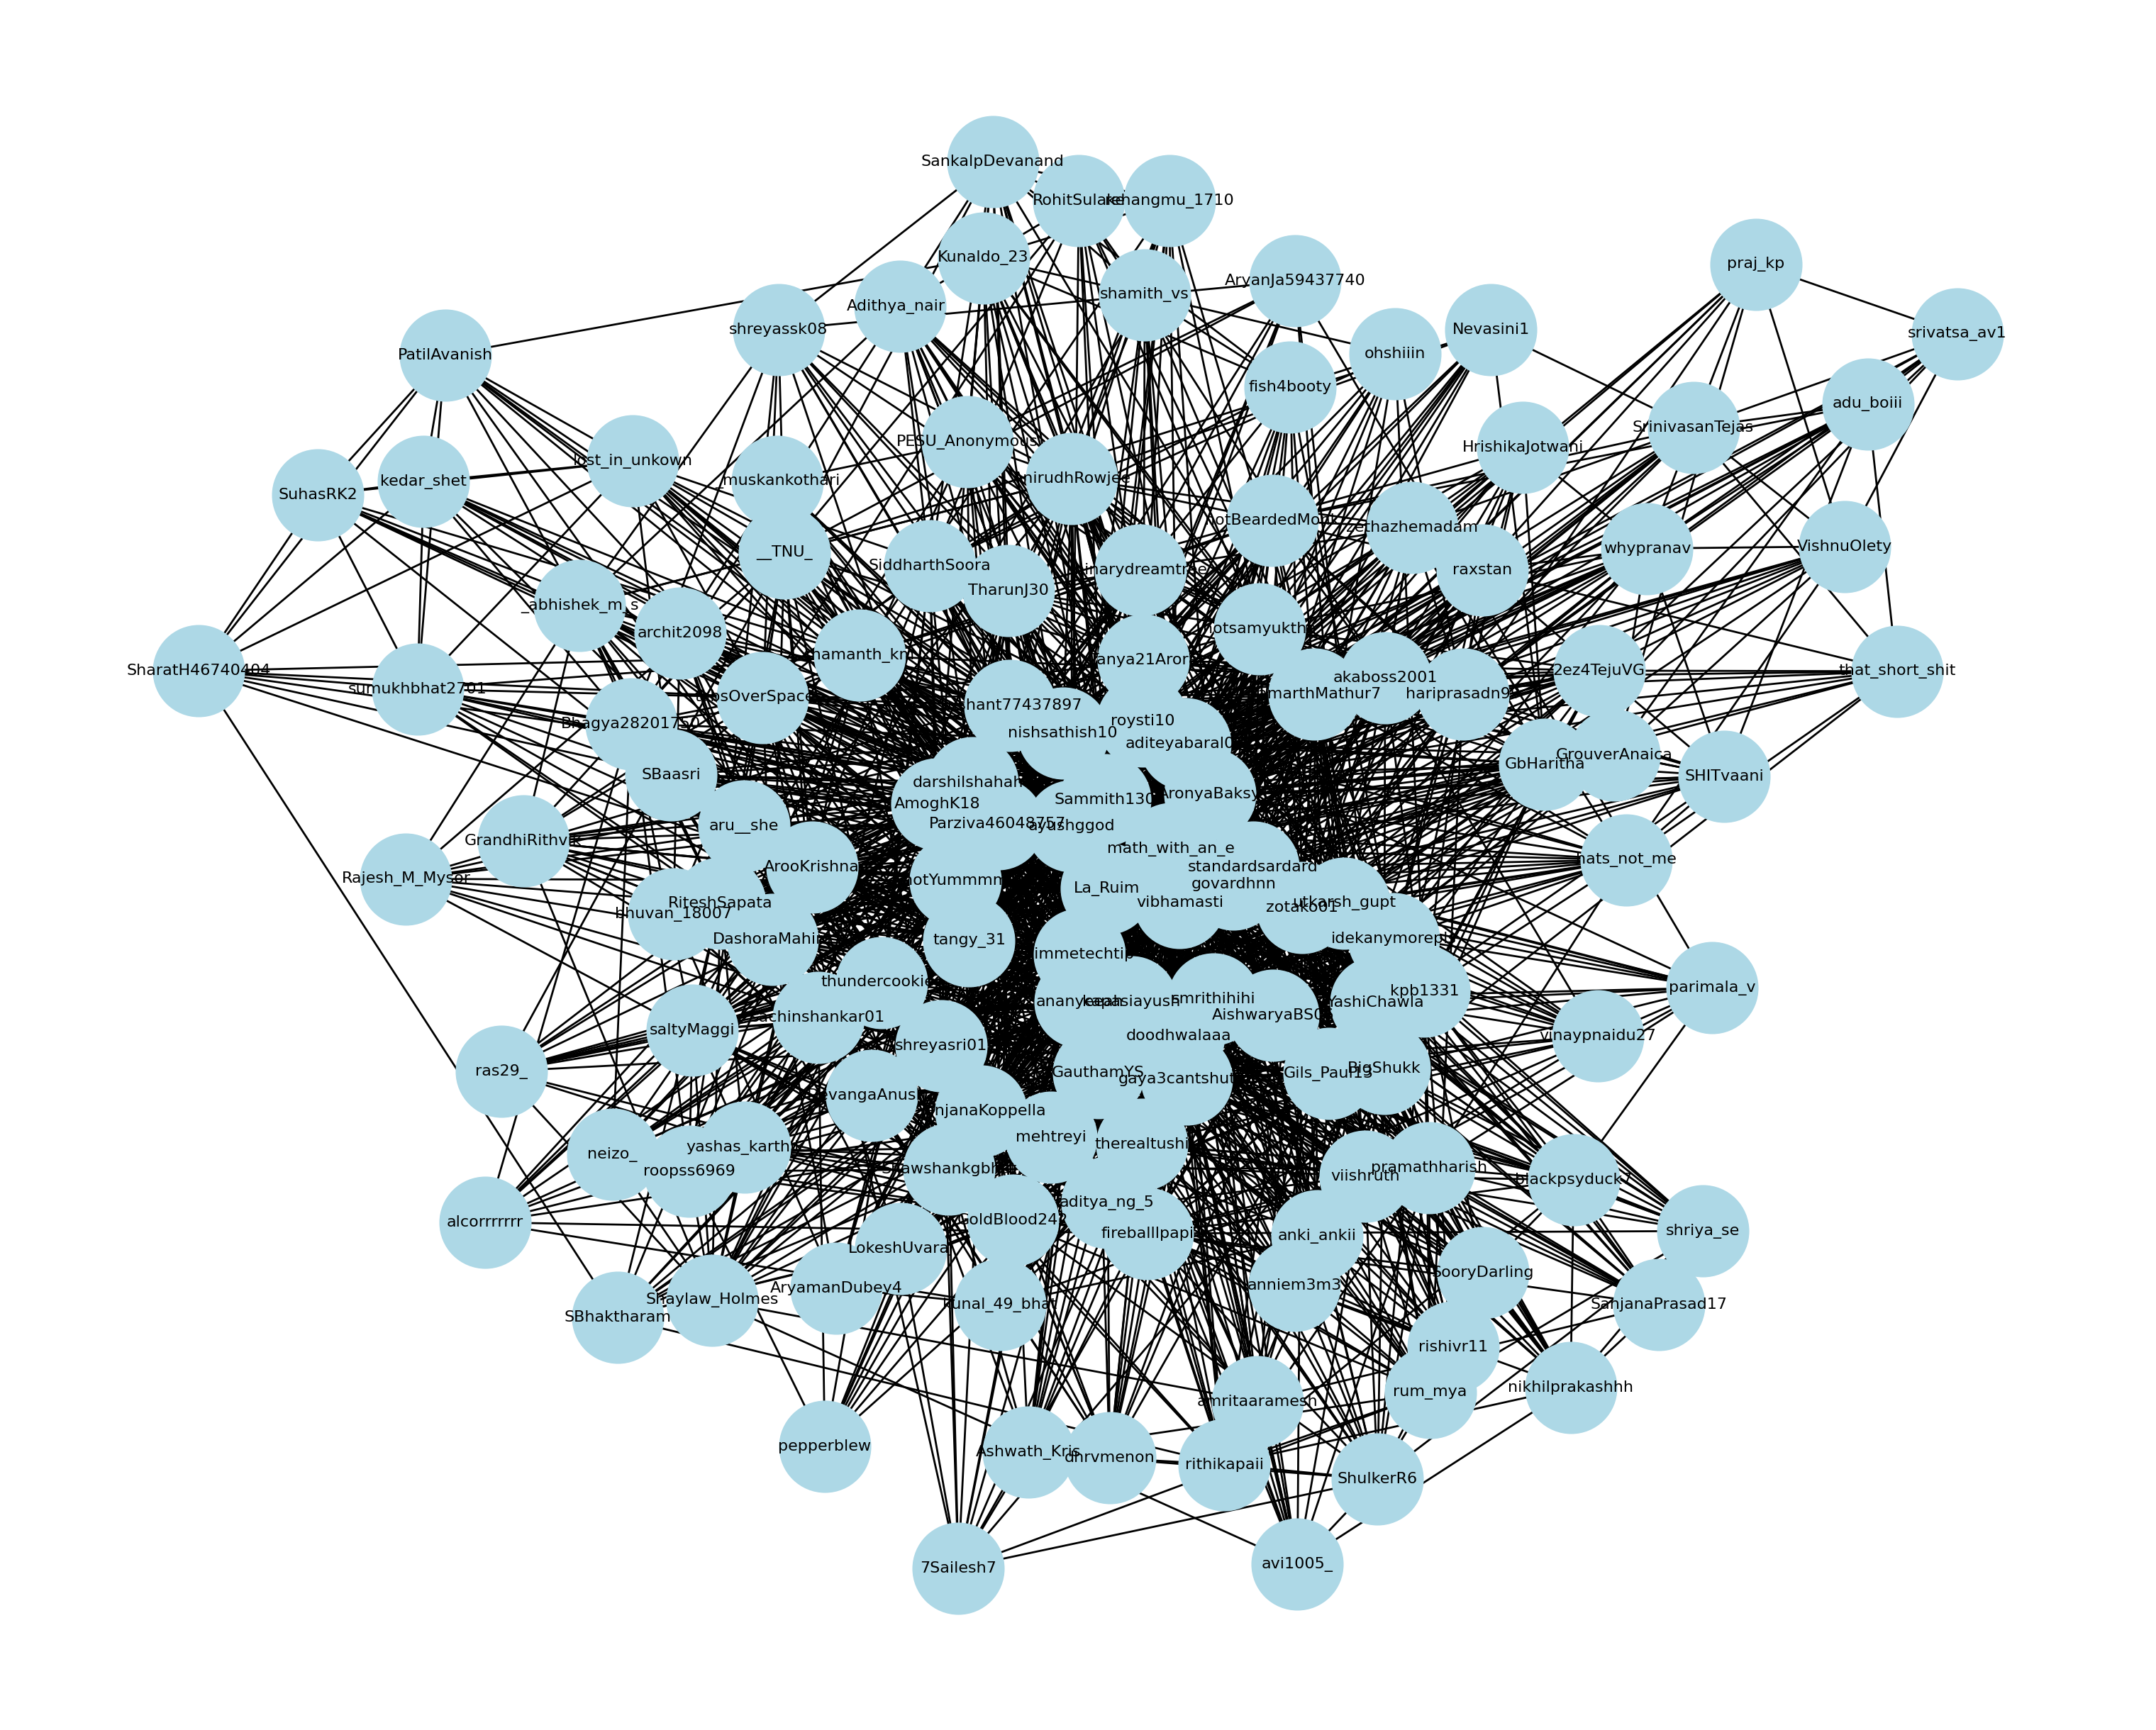

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(3,figsize=(15,12), dpi=200) 
nx.draw(G_tmp, with_labels=True, node_size=2100, font_size=8, node_color="lightblue")
plt.show()
plt.savefig('twitterFollowers.png')

In [44]:
!pip install pyvis

In [45]:
from pyvis.network import Network
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

net.barnes_hut()
sources = df['source']
targets = df['target']

edge_data = zip(sources, targets)

for e in edge_data:
    src = e[0]
    dst = e[1]
    

    net.add_node(src, src, title=src)
    net.add_node(dst, dst, title=dst)
    net.add_edge(src, dst)

neighbor_map = net.get_adj_list()

for node in net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])

#generating an interactive visualisation, open and zoom in and click on nodes to see
net.show('pes-twt.html')